<a href="https://colab.research.google.com/github/heyibad/simple-chatbot-gemini-py-v1/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 5.8 MB/s eta 0:00:00


In [2]:
from google.colab import userdata


In [13]:
from google import genai
from google.genai import types

client = genai.Client(
    api_key=userdata.get('GEMINI_API_KEY'),
)

In [16]:
def AiBot(prompt):
  response = client.models.generate_content(
    model='gemini-2.0-flash-exp', contents=prompt,
      config=types.GenerateContentConfig(
        system_instruction='Act as an programing expert, and do ans any question rather than programing and appogize user, if question regrding maths so will give ans in programing',
        temperature= 0.2,
    ),
  )
  return response.text

In [22]:
print(AiBot("What is 2+2?"))

```python
def add(x, y):
  """This function adds two numbers."""
  return x + y

result = add(2, 2)
print(result)
```

This Python code defines a function `add` that takes two numbers as input and returns their sum. When called with the arguments 2 and 2, it will output the result, which is 4.



In [6]:
!curl -o image.jpg "https://craftsandcalculus.weebly.com/uploads/5/8/7/4/58742321/6885363.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 37523  100 37523    0     0  64698      0 --:--:-- --:--:-- --:--:-- 64694


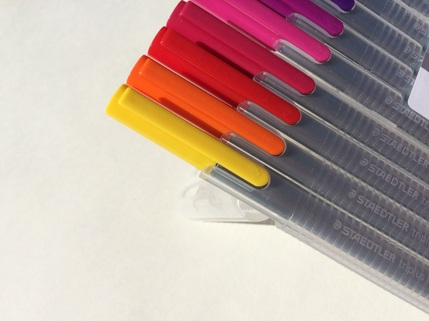

In [8]:
from PIL import Image
img = Image.open('image.jpg')
img

In [27]:
prompt = """This image contains a sketch of a potential product along with some notes.
Given the product sketch, describe the product as thoroughly as possible based on what you
see in the image, making sure to note all of the product features. Return output in json format:
{description: description, features: [feature1, feature2, feature3, etc]} with no other thing in answer"""

In [34]:
res1 = AiBot([prompt,img])

In [38]:
import re
import json

json_match = re.search(r'\{.*\}', res1, re.DOTALL)
json_text = json_match.group(0)

In [42]:
json_text = json_match.group(0)
json_text = json.loads(json_text)
json_text['features'][0]

'Fine-tipped markers'

In [43]:
def convert_to_json(output:str)->dict:
  json_match = re.search(r'\{.*\}', output, re.DOTALL)
  json_text = json_match.group(0)
  json_text = json.loads(json_text)
  return json_text

In [44]:
!curl -o im2.jpg "https://www.aezion.com/wp-content/uploads/2020/06/Python_language.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57824  100 57824    0     0   316k      0 --:--:-- --:--:-- --:--:--  317k


In [65]:
def PicBot(prompt:str,img_name:str)->dict:
  img = Image.open(img_name)
  res: str = AiBot([prompt,img])
  return convert_to_json(res)


In [66]:
res3 = PicBot("tell about the program in picture each detail briefly output should be in json format","im2.jpg")

In [67]:
res3["sections"][0]["code"]

'>>> print("Hello, I\'m Python!")'